In [2]:
# Author: Hassan Ali

In [31]:
#  Problem 1: Dermatology Data Analysis

# Importing libraries and setting up dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering # KMeans: From scikit-learn, a clustering method for partitioning a data set into a set of groups.

import statsmodels.api as sm

df = pd.read_csv('dermatology.csv')
df.head()

,Erythema\tScathing\tDefinite Borders\tItching\tKoebner \tPolygonal\tFollicular\tOral\tKnee\tScalp\tFamily Hostory\tMelanin\tEosinophils\tPNL\tFibrosis\tExocytosis\tAcanothosis\tHyperkeratosis\tParakeratosis\tClubbing\tElongation\tThinning\tSpongiform\tMunro\tFocal\tDisapperance\tVacuolisation\tSpongiosis\tRetes\tFollicular\tPerifollicular\tInflamatory\tBand-like\tAge\tDisease
0,2\t2\t0\t3\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t3...
1,3\t3\t3\t2\t1\t0\t0\t0\t1\t1\t1\t0\t0\t1\t0\t1...
2,2\t1\t2\t3\t1\t3\t0\t3\t0\t0\t0\t1\t0\t0\t0\t1...
3,2\t2\t2\t0\t0\t0\t0\t0\t3\t2\t0\t0\t0\t3\t0\t0...
4,2\t3\t2\t2\t2\t2\t0\t2\t0\t0\t0\t1\t0\t0\t0\t1...


In [33]:
# Loading Data and Preprocessing
#
# Expecting:
# - Columns 1–33: Clinical and histopathological features.
# - Column 34: Age.
# - Column 35: Disease.
#
# The code first attempts to read the file using a comma delimiter. If converting the expected feature columns to numeric yields all NaNs (indicating a possible delimiter issue), it retries with a tab delimiter. If the file is read as a single column, it splits that column by tab.
# Finally, rows with missing values are dropped and the Disease label is encoded.


file_path = 'dermatology.csv'

# Including expected column names for verification (35 columns)
column_names = [
    'Erythema', 'Scaling', 'Definite_borders', 'Itching', 'Koebner_phenomenon',
    'Polygonal_papules', 'Follicular_papules', 'Oral_mucosal_involvement',
    'Knee_elbow_involvement', 'Scalp_involvement', 'Family_history',
    'Melanin_incontinence', 'Eosinophils_infiltrate', 'PNL_infiltrate',
    'Fibrosis_papillary_dermis', 'Exocytosis', 'Acanthosis', 'Hyperkeratosis',
    'Parakeratosis', 'Clubbing_rete_ridges', 'Elongation_rete_ridges',
    'Thinning_suprapapillary_epidermis', 'Spongiform_pustule',
    'Munro_microabscess', 'Focal_hypergranulosis', 'Disappearance_granular_layer',
    'Vacuolization_damage_basal_layer', 'Spongiosis', 'Saw_tooth_retes',
    'Follicular_horn_plug', 'Perifollicular_parakeratosis',
    'Inflammatory_mononuclear_infiltrate', 'Band_like_infiltrate',
    'Age', 'Disease'
]
feature_cols = column_names[:-1]  # All except 'Disease'

# Reading with comma delimiter
try:
    df = pd.read_csv(file_path, header=0)
except Exception as e:
    raise ValueError("Error reading the file with comma delimiter: " + str(e))

if df.shape[1] != len(column_names):
    df = pd.read_csv(file_path, header=None, names=column_names)

df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')

# Use tab delimiter when conversion results in all NaNs for features.
if df[feature_cols].isna().all().all():
    print("Numeric conversion resulted in all NaNs. Retrying with tab delimiter...")
    df = pd.read_csv(file_path, sep='\t', header=0)
    if df.shape[1] == 1:
        df = df.iloc[:, 0].str.split('\t', expand=True)
    if df.shape[1] != len(column_names):
        df.columns = column_names
    else:
        df.columns = column_names
    df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')

df = df.dropna().reset_index(drop=True)
if df.empty:
    raise ValueError("The DataFrame is empty after cleaning. Check the CSV file, its delimiter, and header configuration.")

le = LabelEncoder()
df['Disease_encoded'] = le.fit_transform(df['Disease'])

print("Dataset shape:", df.shape)
print(df.head())

Numeric conversion resulted in all NaNs. Retrying with tab delimiter...
Dataset shape: (358, 36)
   Erythema  Scaling  Definite_borders  Itching  Koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   Polygonal_papules  Follicular_papules  Oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   Knee_elbow_involvement  Scalp_involvement  ...  \
0 


--- Model 1: Gradient Descent Regression ---
Learned parameters (theta_0, theta_1): [0.04188103 0.03673503]
Mean Squared Error: 3.4688612435917774

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     24.46
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.17e-06
Time:                        19:52:52   Log-Likelihood:                -662.49
No. Observations:                 358   AIC:                             1329.
Df Residuals:                     356   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

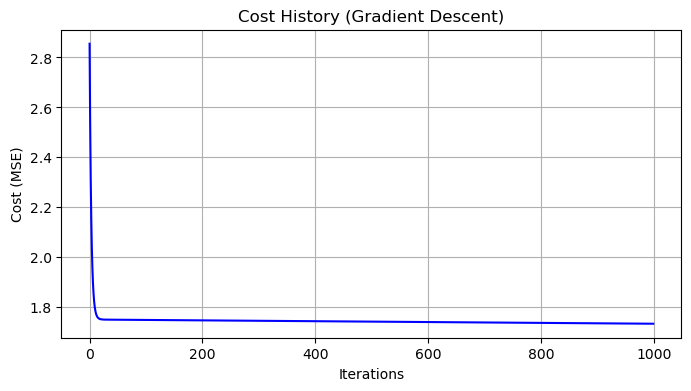

In [35]:
# Model 1: Regression using Gradient Descent
#
# Predict the encoded disease type using only the patient's Age.
#
# We model:
#
# \[
# \hat{y} = \theta_0 + \theta_1 \times \text{Age}
# \]
#
# Using gradient descent to minimize the Mean Squared Error (MSE).
#
# Fitting an OLS regression using statsmodels right before plotting the cost history on the same predictor and print its summary.


X_age = df['Age'].values
y_disease = df['Disease_encoded'].values

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    if m == 0:
        raise ValueError("No data available for gradient descent (m=0).")
    cost_history = []
    for i in range(num_iters):
        predictions = theta[0] + theta[1] * X
        error = predictions - y
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        theta[0] -= alpha * (1/m) * np.sum(error)
        theta[1] -= alpha * (1/m) * np.sum(error * X)
    return theta, cost_history

theta_init = np.zeros(2)
alpha = 0.0001
num_iters = 1000

theta_learned, cost_history = gradient_descent(X_age, y_disease, theta_init, alpha, num_iters)
y_pred_gd = theta_learned[0] + theta_learned[1] * X_age
mse_gd = mean_squared_error(y_disease, y_pred_gd)

print("\n--- Model 1: Gradient Descent Regression ---")
print("Learned parameters (theta_0, theta_1):", theta_learned)
print("Mean Squared Error:", mse_gd)

# Fit an OLS regression model using Age as predictor for comparison.
X_age_ols = sm.add_constant(df['Age'])
ols_model = sm.OLS(y_disease, X_age_ols).fit()
print("\nOLS Regression Results:")
print(ols_model.summary())

plt.figure(figsize=(8, 4))
plt.plot(range(num_iters), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History (Gradient Descent)')
plt.grid(True)
plt.show()


In [37]:
# Model 2: Random Forest Classifier
#
# Classify the disease type using all features (clinical, histopathological, and Age).
#
# Split the data into training and testing sets, train a Random Forest classifier, and evaluate its performance.
#
# Accuracy, classification report, and a basic confusion matrix (printed as a numeric array).


features = column_names[:-1]
X_all = df[features]
y_all = df['Disease_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42) #Splitting Training set 80:20

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("\n--- Model 2: Random Forest Classifier ---")
print("Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


--- Model 2: Random Forest Classifier ---
Accuracy: 98.61%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72

Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 13  0  1  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


In [39]:
# Model 3: k-Nearest Neighbors (kNN) Classifier
#
# Classify the disease type using the kNN algorithm (with k=5) on all features.
#
# Train a kNN classifier, predict on the test set, and evaluate its performance.
#
# Accuracy, classification report, and a basic printed confusion matrix.

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

print("\n--- Model 3: kNN Classifier ---")
print("Accuracy: {:.2f}%".format(knn_accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))


--- Model 3: kNN Classifier ---
Accuracy: 83.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.80      0.57      0.67        14
           2       1.00      0.93      0.96        14
           3       0.44      0.88      0.58         8
           4       1.00      0.75      0.86        12
           5       0.67      1.00      0.80         2

    accuracy                           0.83        72
   macro avg       0.82      0.85      0.81        72
weighted avg       0.89      0.83      0.85        72

Confusion Matrix:
 [[21  1  0  0  0  0]
 [ 0  8  0  6  0  0]
 [ 0  0 13  1  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  2  9  1]
 [ 0  0  0  0  0  2]]


In [41]:
# Model 4: k-Means Clustering
#
#
# Use unsupervised k-Means clustering on all features to examine if natural clusters align with the true disease groups.
#
#
# Clustering performance is assessed using the Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI).

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

kmeans = KMeans(n_clusters=6, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
ari_kmeans = adjusted_rand_score(y_all, clusters_kmeans)
nmi_kmeans = normalized_mutual_info_score(y_all, clusters_kmeans)

print("\n--- Model 4: k-Means Clustering ---")
print("Adjusted Rand Index (ARI): {:.3f}".format(ari_kmeans))
print("Normalized Mutual Information (NMI): {:.3f}".format(nmi_kmeans))



--- Model 4: k-Means Clustering ---
Adjusted Rand Index (ARI): 0.788
Normalized Mutual Information (NMI): 0.879


In [43]:
# Model 5: Agglomerative Clustering
#
#
# Use Agglomerative Clustering on all features to examine if natural clusters align with the true disease groups.
#
#
# The performance is measured using the Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI).

agglo = AgglomerativeClustering(n_clusters=6)
clusters_agglo = agglo.fit_predict(X_scaled)
ari_agglo = adjusted_rand_score(y_all, clusters_agglo)
nmi_agglo = normalized_mutual_info_score(y_all, clusters_agglo)

print("\n--- Model 5: Agglomerative Clustering ---")
print("Adjusted Rand Index (ARI): {:.3f}".format(ari_agglo))
print("Normalized Mutual Information (NMI): {:.3f}".format(nmi_agglo))


--- Model 5: Agglomerative Clustering ---
Adjusted Rand Index (ARI): 0.711
Normalized Mutual Information (NMI): 0.869


In [45]:
# Comparison and Conclusion
#
# - Model 1 (Gradient Descent Regression):
#   Using Age alone to predict disease type is overly simplistic, yielding high error and low explanatory power.
#
# - Model 2 (Random Forest Classifier):
#   This supervised model achieves high accuracy and robust performance.
#
# - Model 3 (kNN Classifier):
#   The kNN classifier also performs well, though it may be more sensitive to parameter choices.
#
# - Models 4 & 5 (Clustering):
#   Both k-Means and Agglomerative Clustering exhibit moderate alignment with the true disease groups (based on ARI and NMI), suggesting that the features capture some inherent structure.
#
# For this diagnostic task, supervised classification (especially ensemble methods like Random Forest) is best suited. Clustering provides additional insights into the natural groupings within the feature space.
#